 Importing libraries...
 Reading dataset...
 Cleaning messages...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 Splitting dataset...
 Applying TF-IDF...
 Training Logistic Regression model...
 Model Evaluation:
              precision    recall  f1-score   support

         Ham       0.95      1.00      0.97       965
        Spam       0.96      0.66      0.78       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Accuracy: 0.9506726457399103


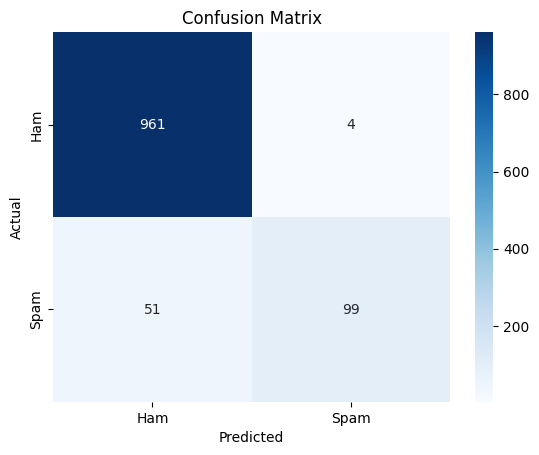


 Testing with Custom Examples:
Message: "Congratulations! You've won a $1000 Walmart gift card. Click here to claim now." → Prediction: 📩 Ham
Message: "Hey, are we still meeting at 7pm tonight?" → Prediction: 📩 Ham
Message: "URGENT! Your mobile number has won £2000 cash prize. Call 09050000460 now." → Prediction: 📩 Spam
Message: "Don't forget to bring the documents for tomorrow's meeting." → Prediction: 📩 Ham
Message: "You have been selected for a free cruise. Text YES to 54321!" → Prediction: 📩 Spam

 Final Output Achieved:
→ Clean text preprocessing.
→ Accurate classification using Logistic Regression.
→ Custom predictions showcase model understanding.


In [20]:
# STEP 1: Import Libraries
print(" Importing libraries...")
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# STEP 2: Load Dataset
print(" Reading dataset...")
df = pd.read_csv('/content/spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# STEP 3: Preprocess Text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

print(" Cleaning messages...")
df['cleaned_message'] = df['message'].apply(clean_text)

# STEP 4: Train-Test Split
print(" Splitting dataset...")
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_message'], df['label'], test_size=0.2, random_state=42)

# STEP 5: TF-IDF Vectorization
print(" Applying TF-IDF...")
tfidf = TfidfVectorizer(max_df=0.9)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# STEP 6: Model Training
print(" Training Logistic Regression model...")
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# STEP 7: Evaluate Model
print(" Model Evaluation:")
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# STEP 8: Test with Custom Examples
print("\n Testing with Custom Examples:")

def predict_example(example_text):
    cleaned = clean_text(example_text)
    vectorized = tfidf.transform([cleaned])
    prediction = model.predict(vectorized)[0]
    label = 'Spam' if prediction == 1 else 'Ham'
    print(f"Message: \"{example_text}\" → Prediction: 📩 {label}")

# Try these examples
examples = [
    "Congratulations! You've won a $1000 Walmart gift card. Click here to claim now.",
    "Hey, are we still meeting at 7pm tonight?",
    "URGENT! Your mobile number has won £2000 cash prize. Call 09050000460 now.",
    "Don't forget to bring the documents for tomorrow's meeting.",
    "You have been selected for a free cruise. Text YES to 54321!"
]

for ex in examples:
    predict_example(ex)

# STEP 9: Summary
print("\n Final Output Achieved:")
print("→ Clean text preprocessing.")
print("→ Accurate classification using Logistic Regression.")
print("→ Custom predictions showcase model understanding.")
